# Python Intermediate: Project

# SOLUTIONS

## Locating the Data

Try to locate the files in the "chis_data" folder, which is in the "data" folder, which is in the main "Python-Fundamentals" folder. Using `pd.read_csv()`, read in all three data frames and assign them to the three variables defined below.

💡 **Tip**: You can use Jupyter Lab's File Browser to the left of your screen to get a sense of where the "chis_data" folder is.

💡 **Tip**: As a reminder, here's how we loaded in data in the previous notebook:

```pd.read_csv('../data/gapminder-FiveYearData.csv')```

In [148]:
# YOUR CODE HERE
import pandas as pd
df_eng = pd.read_csv('../data/chis_data/chis_eng.csv')
df_esp = pd.read_csv('../data/chis_data/chis_esp.csv')
df_other = pd.read_csv('../data/chis_data/chis_other.csv')

In [158]:
df_eng.columns

Index(['general_health', 'veg_perweek', 'feel_left_out', 'poverty_level',
       'household_tenure', 'interview_language'],
      dtype='object')

## Concatenating DataFrames

Look up the [documentation for Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html), and see if you can find a function that **concatenates** the three DataFrames we have now. Save the concatenated list in a new variable called `df`.

In [130]:
# YOUR CODE HERE
df = pd.concat([df_eng,df_esp,df_other])


🔔 **Question**: Let's take a look at the final data frame.

1. How many rows and columns are there in the total dataframe?
2. How many numeric columns are there in the dataset?
3. Which columns look interesting to you?

In [159]:
# YOUR CODE HERE

# Print shape to get amount of rows and columns 
print(df.shape)
# Check out DF to see which columns are numeric
df.head()

(22160, 7)
Index(['general_health', 'fruit_perweek', 'veg_perweek', 'feel_left_out',
       'poverty_level', 'household_tenure', 'interview_language'],
      dtype='object')


,general_health,fruit_perweek,veg_perweek,feel_left_out,poverty_level,household_tenure,interview_language
0,NaN,3,0,NaN,300% FPL AND ABOVE,RENT/SOME OTHER ARRANGEMENT,ENGLISH
1,VERY GOOD,4,2,SOME OF THE TIME,300% FPL AND ABOVE,OWN,ENGLISH
2,VERY GOOD,21,20,NaN,100-199% FPL,RENT/SOME OTHER ARRANGEMENT,ENGLISH
3,GOOD,7,4,HARDLY EVER,100-199% FPL,OWN,ENGLISH
4,GOOD,6,6,NaN,300% FPL AND ABOVE,RENT/SOME OTHER ARRANGEMENT,ENGLISH


<a id='clean'></a>

# Step 2: Data Cleaning

Often, we will want to remove some missing values in a data frame. Have a look at the `general_health` column and find the missing values using the `.isna()` method. Then, use `.sum()` to sum the amount of undefined (NaN) values.

In [4]:
# YOUR CODE HERE
df['general_health'].isna().sum()

885

Get rid of the non-existent values in this column with the `.dropna()` method. Look through the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) to see how to do this.

💡 **Tip**: Use the `subset` argument to select a specific column to remove values from. 

In [5]:
# YOUR CODE HERE
df = df.dropna(subset=['general_health'])

<a id='eda'></a>

# Step 3: Data Analysis

Now that we have preprocessed data, we want to analyze it. Recall that our goal is to visualize a relationship between poverty level and general health. Before we do this, we should get a better grasp of what is in our data.

## Counting Values
The first thing we will want to do is count values of poverty levels: we want to see how many levels there are, and how the data are distributed. 
1. Run `value_counts()` on the `poverty_level` column. 
2. Look through the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) and **normalize** the output of `value_counts()`.

In [162]:
# YOUR CODE HERE
df['poverty_level'].value_counts(normalize=True)


300% FPL AND ABOVE    0.659386
100-199% FPL          0.127392
200-299% FPL          0.126354
0-99% FPL             0.086868
Name: poverty_level, dtype: float64

## Creating a Function

It turns out that poverty is expressed "as Times of 100% Federal Poverty Line (FPL)". One approach to this could be to see if we can find differences in general health for people **below and above the poverty line**. 

To do this, we can create a function that takes in values of the `poverty_level` column and outputs whether that value is above or below the poverty line.

1. Create a new function called `assign_level`. It takes one parameter, which we'll call `i`.
2. If `i` is `0-99% FPL`, return 0. In all other cases, return 1.

In [ ]:
# YOUR CODE HERE
def assign_level(i):
    if i == '0-99% FPL':
        return 0
    else: 
        return 1

## Applying a Function

Recall that we can use the `apply()` method in Pandas to apply our new function to the `poverty_level` column of our DataFrame. We also want to save the output of this `apply()` method to a new column in our DataFrame. 

1. Use the `apply()` method on the `poverty_level` column. Pass your `assign_level` function as the argument.
3. Save the result of this operation in a new column in your `df`, called `above_poverty_line`.

In [ ]:
# YOUR CODE HERE
df['above_poverty_line'] = df['poverty_level'].apply(assign_level)

## Subsetting a DataFrame

In order to create two bar plots of general health – for people above and below the poverty line – we can create two DataFrames for these groups. We can then plot the values in these DataFrames in a barplot.

Recall that we can subset DataFrames with Boolean masks. For instance, say we have a DataFrame `counts` with a column `A`. If we want to create a new DataFrame called `above_800`, which only contains the values over 800 in column `A` of `counts`, we would write:

```
above_800 = counts[counts['A'] > 800]
```

Let's perform the same operation on our data.

1. Create a new DataFrame, `df_below`. It will be a subset of our `df`, based on the condition that the value in `above_poverty_line` is 0.
2. Create a new DataFrame, `df_above`. It will be a subset of our `df`, based on the condition that the value in `above_poverty_line` is 1.

In [ ]:
# YOUR CODE HERE
df_below = df[df['above_poverty_line'] == 0]
df_above = df[df['above_poverty_line'] == 1]

## Creating the Visualization

Finally, let's create our bar plots. We will create 2 plots in 1 cell, which will be plotted on top of one another. 

Fill in the blanks below, following the steps. 

1. Run a **normalized** `value_counts()` on the `general_health` column of `df_above` and `df_below`.
2. Run `plot()` on the output of the resulting DataFrame. Enter the values for two arguments: `kind` must be set to `bar`, and `alpha` must be set to `.5`.


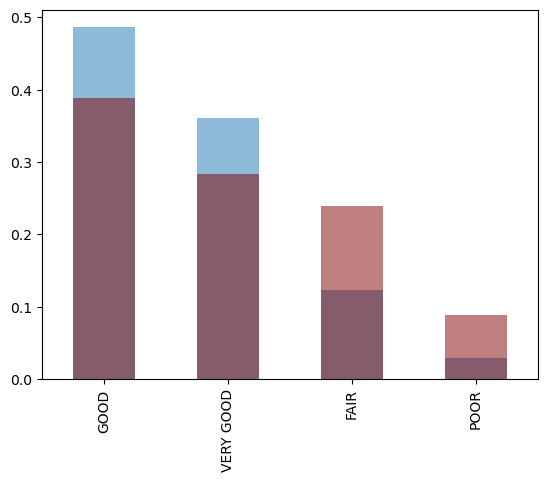

In [165]:
# USE FOR VIS
df_above['general_health'].value_counts(normalize=True).plot(kind='bar', alpha=.5);
df_below['general_health'].value_counts(normalize=True).plot(kind='bar',alpha=.5, color='maroon');